In [1]:
import os
import pandas as pd
import glob
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import pdb
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes #hold



In [2]:
####################################################
## import the experimental values
# set paths
repobasedir = os.getcwd()
experimentalfile = os.path.join(repobasedir, 'experimentalMetabolics_all.csv')
# read in the file to dataframe
expmetcost_df = pd.read_csv(experimentalfile)
print(expmetcost_df)
# print(expmetcost)
# f, ax = plt.subplots()
# expmetcost.plot(x="experiment [pi]",y="cost [W/kg]",title="plot of all exp costs",ax=ax)
# expmetcost_df.plot(y="metabolics_all_avg",title="plot of all exp costs",ax=ax, marker='o', alpha=0.7)
# plt.show()
# import pdb
# pdb.set_trace()



     metabolics_all_avg subjectname     condname experimentname trialname
0              5.067015     wals024    walsslack          walsh   trial01
1              4.214548     wals077    walsslack          walsh   trial01
2              4.290595     wals088    walsslack          walsh   trial01
3              5.698502     wals112    walsslack          walsh   trial01
4              4.382331     wals127    walsslack          walsh   trial01
..                  ...         ...          ...            ...       ...
662           10.361830     sild035  sild10wrun0         silder   trial01
663            2.904840     sild035     sild20w0         silder   trial01
664           11.630630     sild035  sild20wrun0         silder   trial01
665            3.954340     sild035     sild30w0         silder   trial01
666           12.044730     sild035  sild30wrun0         silder   trial01

[667 rows x 5 columns]


In [3]:
## import all of the simulation results
# set all the paths
simresultspath = os.path.join(repobasedir,'..\\metabolicsResults\\')
muscleinversepath = os.path.join(simresultspath,'muscleInverse\\')
muscleInverseWithEMGpath = os.path.join(simresultspath,'muscleInverseWithEMG\\')

## first handle the values in the regular muscle driven inverse problem
# get all the filenames
musclefiles = glob.glob(os.path.join(muscleinversepath,'*.csv'))
# load them all into a single dataframe
df_from_each_file = (pd.read_csv(f) for f in musclefiles)
# print(df_from_each_file)
muscle_df = pd.concat(df_from_each_file, ignore_index=True)
muscle_df

,Row,metabolics_all_avg,metabolics_act_avg,metabolics_short_avg,metabolics_basal_avg,metabolics_mech_avg,metabolics_gas_avg,metabolics_sol_avg,metabolics_bifemlh_avg,metabolics_recfem_avg,metabolics_swing_avg,metabolics_stance_avg,model_mass,subjectname,condname,experimentname,trialname
0,trial,10.400014,5.306119,7.105892,1.2,-3.211997,2.086024,4.847999,2.065147,1.281867,2.670731,7.464392,66.80,welk002,welknatural,welk,trial01
1,trial,11.226170,5.587081,6.625586,1.2,-2.186496,2.214842,5.648507,4.840408,1.337813,3.102622,7.623666,66.80,welk002,welknatural,welk,trial02
2,trial,10.226703,5.070600,5.700827,1.2,-1.744724,2.105852,4.907547,3.463872,0.969051,2.656206,6.917954,66.80,welk002,welknatural,welk,trial03
3,trial,10.292716,5.060787,6.374330,1.2,-2.342401,6.707776,17.514079,3.569233,2.730621,2.774289,6.863222,66.80,welk002,welknatural,welk,trial04
4,trial,10.006568,5.005966,5.095338,1.2,-1.294735,8.373479,87.186571,24.718241,6.285653,2.822486,6.637611,66.80,welk002,welkexo,welk,trial01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,trial,12.340740,5.668019,6.879267,1.2,-1.406547,0.000000,0.000000,0.000000,0.000000,3.876843,8.857108,57.61,welk013,welknatural,welk,trial04
60,trial,11.589969,4.903341,5.501944,1.2,-0.015316,12.723181,108.862113,18.219791,11.849182,4.059539,6.809961,57.61,welk013,welkexo,welk,trial01
61,trial,11.705520,4.980599,5.547384,1.2,-0.022464,86.251184,29.171200,43.895899,16.089714,4.027926,7.088132,57.61,welk013,welkexo,welk,trial02
62,trial,11.394510,4.906719,5.552528,1.2,-0.264738,11.403161,109.069666,19.406946,11.971729,3.895941,6.769394,57.61,welk013,welkexo,welk,trial03


In [12]:

# get the full metabolics dataframe
# test_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_all_avg':['mean']})
test_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_all_avg':['mean']})
test_df.columns = ['metabolics_all_avg_mean']
test_df = test_df.reset_index()
print('test_df: full metabolics df')
print(test_df)

# get the swing metabolics dataframe
# swing_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_swing_avg':['mean']})
swing_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_swing_avg':['mean']})
swing_df.columns = ['metabolics_swing_avg_mean']
swing_df = swing_df.reset_index()
print('swing_df')
print(swing_df)
# get the stance metabolics dataframe
# stance_df = muscle_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_stance_avg':['mean']})
stance_df = muscle_df.groupby(['subjectname','condname']).agg({'metabolics_stance_avg':['mean']})
stance_df.columns = ['metabolics_stance_avg_mean']
stance_df = stance_df.reset_index()
print('stance_df')
print(stance_df)


test_df: full metabolics df
   subjectname     condname  metabolics_all_avg_mean
0      welk002      welkexo                 9.786012
1      welk002  welknatural                10.536401
2      welk003      welkexo                10.720083
3      welk003  welknatural                11.088915
4      welk005      welkexo                 8.812403
5      welk005  welknatural                 9.692390
6      welk007      welkexo                10.682661
7      welk007  welknatural                 9.707479
8      welk008      welkexo                 9.139394
9      welk008  welknatural                10.006398
10     welk009      welkexo                10.573042
11     welk009  welknatural                11.120386
12     welk010      welkexo                11.109108
13     welk010  welknatural                11.509599
14     welk013      welkexo                11.507214
15     welk013  welknatural                12.461436
swing_df
   subjectname     condname  metabolics_swing_avg_mean
0      

In [13]:

# get the experimental metabolics dataset in the same form - averaged across subject conditions and trials. 

# exp_df = expmetcost_df.groupby(['subjectname','condname','trialname']).agg({'metabolics_all_avg':['mean']})
# exp_df.columns = ['metabolics_all_avg_mean']
# exp_df = exp_df.reset_index()
# print('exp_df')
# print(exp_df)

# try to average across the gait cycles. 
exp_df2 = expmetcost_df.groupby(['subjectname','condname']).agg({'metabolics_all_avg':['mean']})
exp_df2.columns = ['metabolics_all_avg_mean']
exp_df2 = exp_df2.reset_index()
exp_df = exp_df2
print('exp_df')
print(exp_df)

exp_df
          subjectname            condname  metabolics_all_avg_mean
0             demb005      dembloadedfree                 6.040289
1             demb005   dembloadedmatched                 6.281147
2             demb005      dembnoloadfree                 4.682754
3             demb005      dembnoloadslow                 4.152233
4             demb007      dembloadedfree                 6.282373
5             demb007   dembloadedmatched                 7.407283
6             demb007      dembnoloadfree                 5.096163
7             demb007      dembnoloadslow                 4.287725
8             demb009      dembloadedfree                 6.629501
9             demb009   dembloadedmatched                 7.172946
10            demb009      dembnoloadfree                 4.776633
11            demb009      dembnoloadslow                 4.115363
12            demb010      dembloadedfree                 9.421522
13            demb010   dembloadedmatched              

In [15]:

# trials included
# both_df = pd.merge(test_df, exp_df, how='right', on=['subjectname','condname','trialname'])
# averaged on trials too
both_df = pd.merge(test_df, exp_df, how='right', on=['subjectname','condname'])
pd.set_option('display.max_rows',None) #,'display.max_columns',None)

bothtrim_df = both_df.dropna()
print(bothtrim_df)

    subjectname     condname  metabolics_all_avg_mean_x  \
439     welk002      welkexo                   9.786012   
443     welk002  welknatural                  10.536401   
447     welk003      welkexo                  10.720083   
451     welk003  welknatural                  11.088915   
463     welk005      welkexo                   8.812403   
464     welk005  welknatural                   9.692390   
465     welk007      welkexo                  10.682661   
466     welk007  welknatural                   9.707479   
467     welk008      welkexo                   9.139394   
468     welk008  welknatural                  10.006398   
469     welk009      welkexo                  10.573042   
470     welk009  welknatural                  11.120386   
471     welk010      welkexo                  11.109108   
472     welk010  welknatural                  11.509599   
475     welk013      welkexo                  11.507214   
476     welk013  welknatural                  12.461436 

In [21]:
### going to make a print out of the actual reductions for swing and stance, as well as percent 
# grab the raw differences between them
stance_means = stance_df.groupby(['condname']).agg({'metabolics_stance_avg_mean':['mean']})
swing_means = swing_df.groupby(['condname']).agg({'metabolics_swing_avg_mean':['mean']})

print(stance_means)
print(swing_means)

# get all the values in a workable format
swings_exo = swing_df.loc[swing_df['condname'] == 'welkexo']
swings_natural = swing_df.loc[swing_df['condname'] == 'welknatural']
stances_exo = stance_df.loc[stance_df['condname'] == 'welkexo']
stances_natural = stance_df.loc[stance_df['condname'] == 'welknatural']

# get the average raw differences for both stance and swing - check with above
stance_change = np.mean(stances_exo) - np.mean(stances_natural)
swing_change = np.mean(swings_exo) - np.mean(swings_natural)
# now to get the percent changes for stance and swing
stance_perc_change = (np.mean(stances_exo) - np.mean(stances_natural)) / np.mean(stances_natural) * 100
swing_perc_change = (np.mean(swings_exo) - np.mean(swings_natural)) / np.mean(swings_natural) * 100

print("Raw stance difference: %f" % stance_change)
print('Raw swing  difference: %f' % swing_change)
print('Percent Difference stance: %f' % stance_perc_change)
print('Percent Difference swing: %f' % swing_perc_change)



            metabolics_stance_avg_mean
                                  mean
condname                              
welkexo                       6.494838
welknatural                   7.331911
            metabolics_swing_avg_mean
                                 mean
condname                             
welkexo                      3.168580
welknatural                  3.188264
Raw stance difference: -0.837073
Raw swing  difference: -0.019684
Percent Difference stance: -11.416842
Percent Difference swing: -0.617391


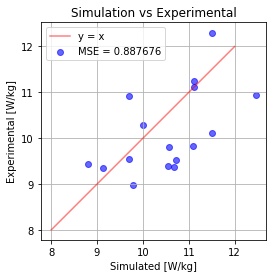

In [22]:

# make a figure for the simulations vs exp
f, ax = plt.subplots()
tempx = bothtrim_df['metabolics_all_avg_mean_x']
tempy = bothtrim_df['metabolics_all_avg_mean_y']
mse = mean_squared_error(tempy, tempx)
ax.scatter(tempx, tempy, marker='o', alpha=0.6, c='blue', label='MSE = %f'%mse)
# line = mlines.Line2D([0,1], [0,1], color='red')
# transform = ax.transAxes
# line.set_transform(transform)
# ax.add_line(line)
unitx = np.linspace(8,12,100)
ax.plot(unitx,unitx,color='red',alpha=0.5, label='y = x')
# some nice 
ax.set_title('Simulation vs Experimental')
# plt.xlim([8, 13])
# plt.ylim([8, 13])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlabel('Simulated [W/kg]')
plt.ylabel('Experimental [W/kg]')
plt.legend()
# plt.show()

In [23]:
# make a figure for exo vs natural stance and swing
# thinking box plots
# pdb.set_trace()

swingexo = np.array([])
swingnatural = np.array([])
stanceexo = np.array([])
stancenatural = np.array([])

# split the swings up
for i, row in swing_df.iterrows():
    # print(i)
    # print(row)
    tempcond = row['condname']
    if 'welkexo' in tempcond:
        swingexo = np.append(swingexo, row['metabolics_swing_avg_mean'])
    elif 'welknatural' in tempcond:
        swingnatural = np.append(swingnatural, row['metabolics_swing_avg_mean'])
for i, row in stance_df.iterrows():
    # print(i)
    # print(row)
    tempcond = row['condname']
    if 'welkexo' in tempcond:
        stanceexo = np.append(stanceexo, row['metabolics_stance_avg_mean'])
    elif 'welknatural' in tempcond:
        stancenatural = np.append(stancenatural, row['metabolics_stance_avg_mean'])


In [19]:
# function for setting the colors of the box plots pairs
def setBoxColors(bp):

    setp(bp['boxes'][1], color='blue')
    setp(bp['caps'][2], color='blue')
    setp(bp['caps'][3], color='blue')
    setp(bp['whiskers'][2], color='blue')
    setp(bp['whiskers'][3], color='blue')
    setp(bp['fliers'][0], color='blue')
    setp(bp['fliers'][1], color='blue')
    setp(bp['medians'][1], color='blue')

    setp(bp['boxes'][0], color='red')
    setp(bp['caps'][0], color='red')
    setp(bp['caps'][1], color='red')
    setp(bp['whiskers'][0], color='red')
    setp(bp['whiskers'][1], color='red')
    setp(bp['fliers'][0], color='red')
    setp(bp['fliers'][1], color='red')
    setp(bp['medians'][0], color='red')


!!! Need to change this to only get the one leg and not the double !!!

 We really are only showing the results of one leg


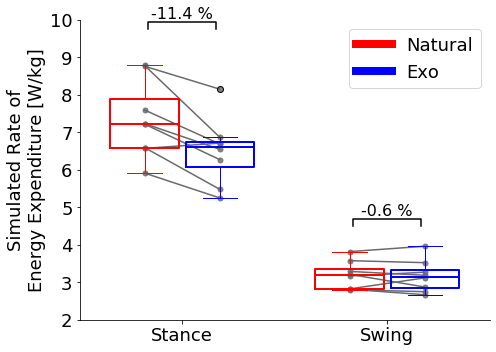

In [20]:
print("!!! Need to change this to only get the one leg and not the double !!!\n\n We really are only showing the results of one leg")

swings = [swingnatural, swingexo]
stances = [stancenatural, stanceexo]


# pdb.set_trace()
fig = figure(figsize=(7,5))
ax = axes()
#hold(True)

boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2)
meanprops = dict(linewidth=2)
flierprops = dict(linewidth=2)


# first pair - stance
bp = boxplot(stances, positions=[0.95,2.05], widths=1, zorder=100, 
             boxprops=boxprops, 
             meanprops=meanprops, 
             medianprops=medianprops,
            flierprops=flierprops)
setBoxColors(bp)
# second pair - swing
bp = boxplot(swings, positions=[3.95,5.05], widths=1, zorder=105,
            boxprops=boxprops, 
             meanprops=meanprops, 
             medianprops=medianprops,
            flierprops=flierprops)
setBoxColors(bp)
# set axes limits and labels
xlim(0,6)
ylim(2,10)


ax.set_xticks([1.5, 4.5])
# ax.set_xticklabels(['Stance\n{}% Avg. Difference', 'Swing\n{}% Avg. Difference'.format(stance_perc_change,swing_perc_change)],fontsize=24)
ax.set_xticklabels(['Stance', 'Swing'],fontsize=18)
# ax.yticks(fontsize=24)
# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1],'r-', lw=8)
hR, = plot([1,1],'b-', lw=8)
plt.legend((hB, hR),('Natural', 'Exo'),fontsize=18)
plt.ylabel('Simulated Rate of\nEnergy Expenditure [W/kg]',fontsize=18)
plt.yticks(fontsize=18)
hB.set_visible(False)
hR.set_visible(False)
# plt.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

colorsjit = ['red', 'blue']
for i in [1,2]: # ,4,5]:
    y = stances[i-1] # titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    # x = np.random.normal(i, 0.0, size=len(y))
    x = [.95*np.ones(len(y)), 2.05*np.ones(len(y))]
    plot(x[i-1], y, '.', alpha=0.8, color='dimgrey', zorder=4, markersize=10) # color=colorsjit[i-1])
for i in [4,5]:
    y = swings[i-4]
    # x = np.random.normal(i, 0.0, size=len(y))
    # need a different x value
    x = [3.95*np.ones(len(y)), 5.05*np.ones(len(y))]
    plot(x[i-4], y, '.', alpha=0.8, color='dimgrey', zorder=3, markersize=10) # color=colorsjit[i-4])

# figure out subject lines across conditions
x_stances = [0.95*np.ones(len(stances[0])), 2.05*np.ones(len(stances[1]))]
x_swings = [3.95*np.ones(len(stances[0])), 5.05*np.ones(len(stances[1]))]

plot(x_stances, stances, color='dimgrey', zorder=1)
plot(x_swings, swings, color='dimgrey', zorder=2)

# now figure out the bracket
x1, x2 = 1,2
y, h, col =  9.75, 0.2, 'black'
plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], color=col)
plt.text((x1+x2)*.5, y+h, '%.1f %%'%stance_perc_change, ha='center', va='bottom', color=col,
        fontsize=16)

x3, x4 = 4,5
y2, h2, col2 = 4.5, 0.2, 'black'
plt.plot([x3,x3,x4,x4], [y2, y2+h2, y2+h2, y2], color=col2)
plt.text((x3+x4)*.5, y2+h2, '%.1f %%'%swing_perc_change, ha='center', va='bottom', color=col2,
        fontsize=16)

plt.tight_layout()

fname = os.path.join(repobasedir, '..\\analysis\\figure1_stancevsswing.png')
plt.savefig(fname, dpi=300)

In [10]:
repobasedir

'G:\\Shared drives\\Exotendon\\muscleModel\\muscleEnergyModel'